# **Exercise: Data Preparation**

Pada latihan kali ini, kita akan menggunakan beberapa metode yang telah kita pelajari:

- Encoding
- Scaling
- Regularization
<br><br>

**Gunakan melb_data.csv (Melbourne House Data) dengan:**
- Features: 'Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname'
- Target: 'Price'

**Lakukan tahapan ini pada preprocessing dan modeling:**
- Lakukan EDA secara sederhana untuk eksplorasi dataset.
- Splitting dataset dengan proporsi 80:20 dan random_state = 2020
- Gunakan ColumnTransformer untuk encoding.
    - Ada 5 features categorical. Lakukan encoding pada features tersebut sesuai dengan karakter masing-masing feature.
- Lakukan Scaling pada numerical features. Pilih scaler yang menurut kamu paling sesuai berdasarkan karakteristik datanya.
- Lakukan fitting model dan evaluasi dengan metode Lasso pada data yang telah dilakukan preprocessing.


## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **Load & Explore Dataset**

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df = df[['Suburb','Rooms','Type','Method','Distance','Bedroom2','Bathroom','Car','Landsize',
            'BuildingArea','YearBuilt','CouncilArea','Regionname','Price']]

In [5]:
df.shape

(13580, 14)

In [6]:
df.describe()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Price
count,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,1.358000e+04
mean,2.937997,10.137776,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,1.075684e+06
std,0.955748,5.868725,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,6.393107e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,8.500000e+04
25%,2.000000,6.100000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,6.500000e+05
50%,3.000000,9.200000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,9.030000e+05
75%,3.000000,13.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,1.330000e+06
max,10.000000,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,9.000000e+06


In [7]:
df.describe(include='object')

,Suburb,Type,Method,CouncilArea,Regionname
count,13580,13580,13580,12211,13580
unique,314,3,5,33,8
top,Reservoir,h,S,Moreland,Southern Metropolitan
freq,359,9449,9022,1163,4695


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        13580 non-null  object 
 1   Rooms         13580 non-null  int64  
 2   Type          13580 non-null  object 
 3   Method        13580 non-null  object 
 4   Distance      13580 non-null  float64
 5   Bedroom2      13580 non-null  float64
 6   Bathroom      13580 non-null  float64
 7   Car           13518 non-null  float64
 8   Landsize      13580 non-null  float64
 9   BuildingArea  7130 non-null   float64
 10  YearBuilt     8205 non-null   float64
 11  CouncilArea   12211 non-null  object 
 12  Regionname    13580 non-null  object 
 13  Price         13580 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1.5+ MB


In [9]:
df.select_dtypes('object').head()

,Suburb,Type,Method,CouncilArea,Regionname
0,Abbotsford,h,S,Yarra,Northern Metropolitan
1,Abbotsford,h,S,Yarra,Northern Metropolitan
2,Abbotsford,h,SP,Yarra,Northern Metropolitan
3,Abbotsford,h,PI,Yarra,Northern Metropolitan
4,Abbotsford,h,VB,Yarra,Northern Metropolitan


### **Simple EDA**

In [10]:
# categorical features
cat_features = [feature for feature in df.columns if ((df[feature].dtypes == 'O') & (feature not in ['Suburb']))]
cat_features

['Type', 'Method', 'CouncilArea', 'Regionname']

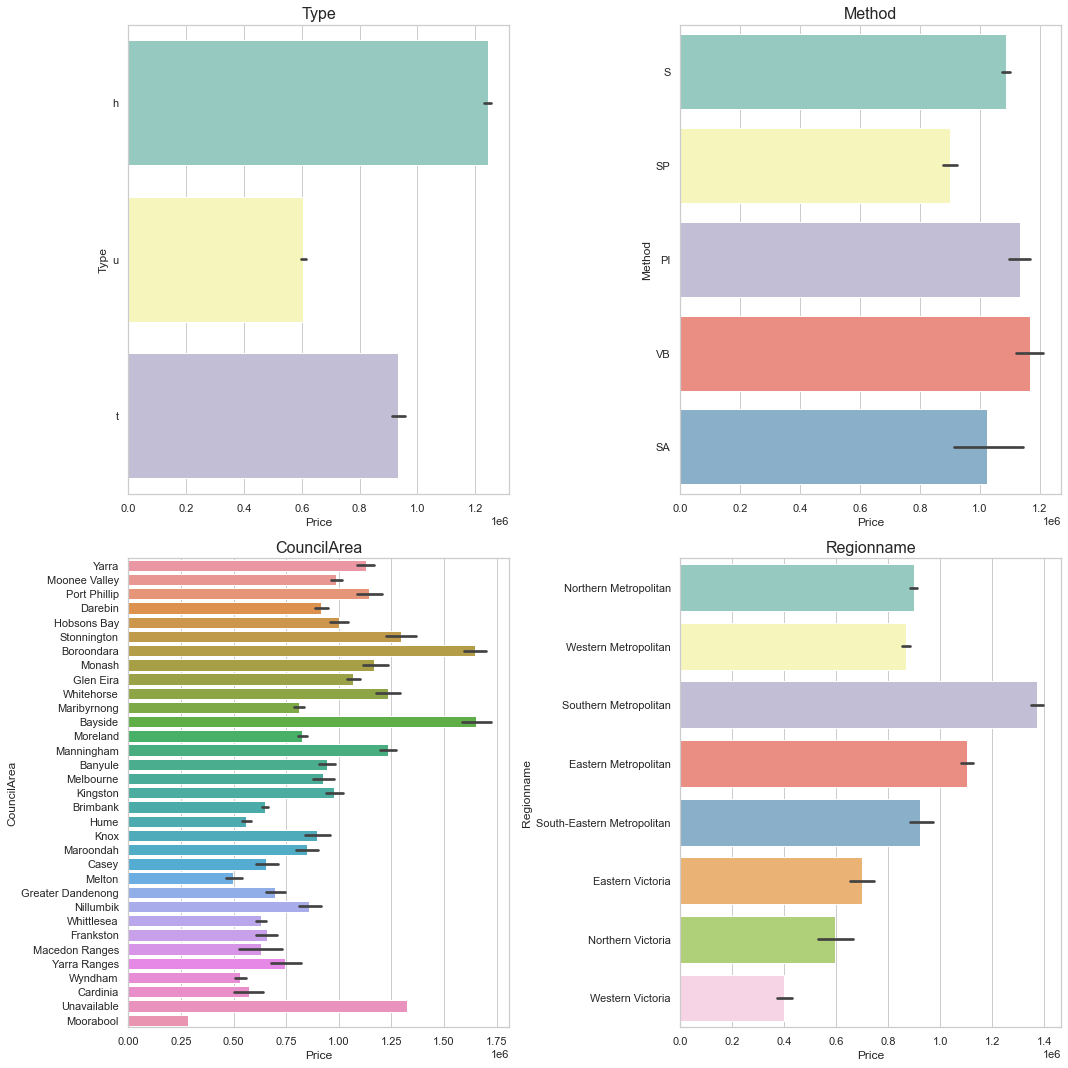

In [11]:
# Harga rumah berdasarkan tiap categorical feature

plt.figure(figsize=(15, 15), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in cat_features:
    # subplot (letak grafik)
    ax = plt.subplot(2, 2, plotnumber)
    
    # Harga rumah berdasarkan feature 
    sns.barplot(x = 'Price', y = feature, data = df)
    
    plt.xlabel('Price')
    plt.ylabel(feature)
    plt.title(feature, fontsize=16)
    plt.tight_layout();
    
    plotnumber += 1

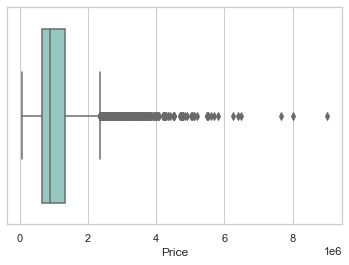

In [12]:
# Distribusi Harga Rumah
sns.boxplot(x='Price', data=df);

In [13]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature

['Rooms',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Price']

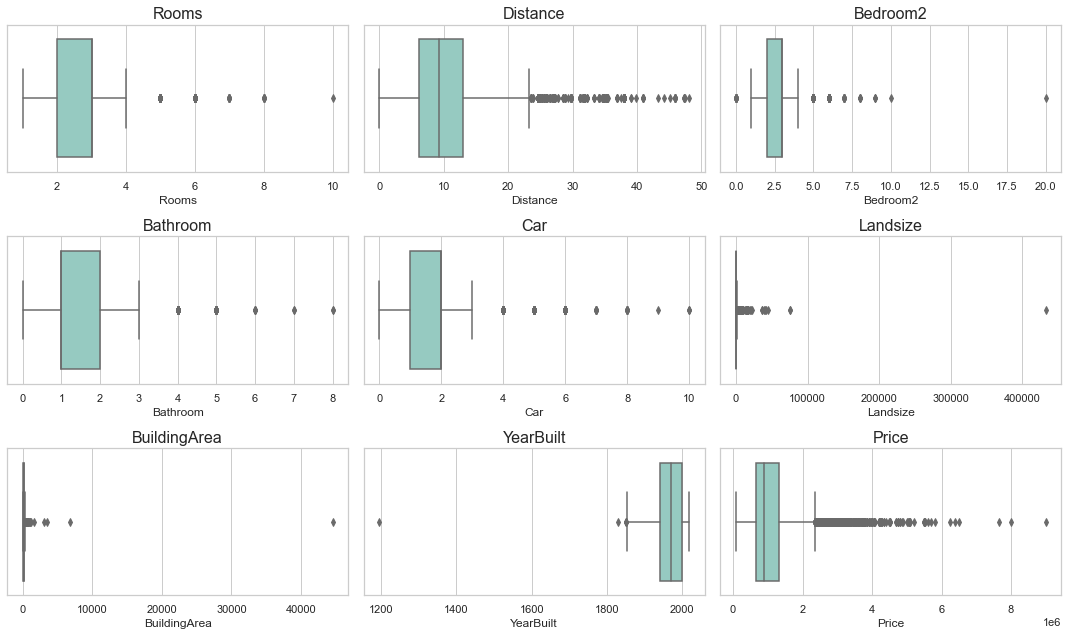

In [14]:
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1


In [15]:
# Outliers
outliers = df[(df['Bedroom2'] > 10) | (df['Landsize'] > 100000) | (df['BuildingArea'] > 10000) | (df['YearBuilt'] < 1800) ]
outliers

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Price
7404,Caulfield East,3,h,PI,9.3,20.0,1.0,2.0,875.0,NaN,NaN,Glen Eira,Southern Metropolitan,1650000.0
9968,Mount Waverley,3,h,VB,14.2,3.0,1.0,4.0,807.0,117.0,1196.0,Monash,Eastern Metropolitan,1200000.0
11020,Fitzroy,3,h,VB,2.1,3.0,3.0,1.0,433014.0,NaN,NaN,Yarra,Northern Metropolitan,2700000.0
13245,New Gisborne,5,h,S,48.1,5.0,3.0,5.0,44500.0,44515.0,NaN,NaN,Northern Victoria,1355000.0


In [16]:
# df = df.drop(outliers.index, axis=0)

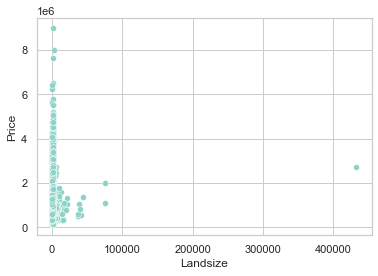

In [17]:
# Price vs Landsize
sns.scatterplot(x='Landsize', y='Price', data=df);

In [18]:
# Outlier pada Landsize
df[df['Landsize'] > 400000]

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Price
11020,Fitzroy,3,h,VB,2.1,3.0,3.0,1.0,433014.0,NaN,NaN,Yarra,Northern Metropolitan,2700000.0


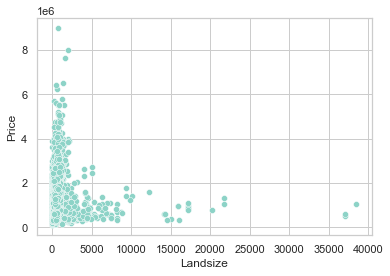

In [19]:
sns.scatterplot(x='Landsize', y='Price', data=df[df['Landsize'] < 40000]);

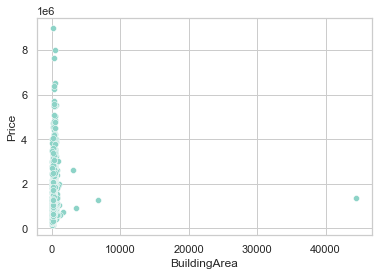

In [20]:
# Building Area vs Price
sns.scatterplot(x='BuildingArea', y='Price', data=df);

In [21]:
# Outlier
df[df['BuildingArea'] > 40000]

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Price
13245,New Gisborne,5,h,S,48.1,5.0,3.0,5.0,44500.0,44515.0,NaN,NaN,Northern Victoria,1355000.0


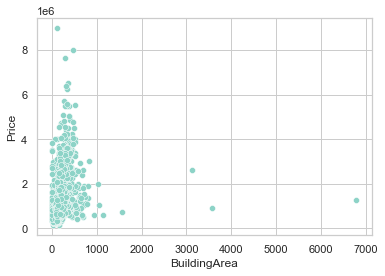

In [22]:
sns.scatterplot(x='BuildingArea', y='Price', data=df[df['BuildingArea'] < 40000]);

In [23]:
df.isna().sum()

Suburb             0
Rooms              0
Type               0
Method             0
Distance           0
Bedroom2           0
Bathroom           0
Car               62
Landsize           0
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
Regionname         0
Price              0
dtype: int64

In [24]:
# Check correlation to the target
df.corr()['Price']

Rooms           0.496634
Distance       -0.162522
Bedroom2        0.475951
Bathroom        0.467038
Car             0.238979
Landsize        0.037507
BuildingArea    0.090981
YearBuilt      -0.323617
Price           1.000000
Name: Price, dtype: float64

## **Load Data**

In [25]:
# Import Libraries
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer # untuk transformers
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce # untuk ordinal dan binary encoder
from sklearn.preprocessing import RobustScaler

In [26]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [27]:
df.dropna(inplace=True)

In [28]:
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

## **Data Splitting**

In [29]:
# Define X and y
X = df[['Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname']]
y = df['Price']

In [30]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=2020
)

## **Data Transform**

### Encoding:
- Binary Encoding : 'Suburb', 'CouncilArea', 'Regionname'
- Onehot Encoding : 'Type', 'Method'

### Scaling:
- RobustScaler() karena terdapat banyak outliers

In [31]:
df.describe(include='object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,6196,6196,6196,6196,6196,6196,6196,6196
unique,287,6117,3,5,203,51,31,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,154,3,4088,3957,763,225,658,2166


In [32]:
# Encoding
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Type','Method']),
    ('binary', ce.BinaryEncoder(), ['Suburb','CouncilArea','Regionname']),
], remainder='passthrough')

In [33]:
# .fit and .transform method
X_train_prep = transformer.fit_transform(X_train) 

# .transform method
X_test_prep = transformer.transform(X_test) 

## **Scaling**

In [34]:
# Scaling
scaler = RobustScaler()

X_train_prep_scaled = scaler.fit_transform(X_train_prep)
X_test_prep_scaled = scaler.transform(X_test_prep)

In [35]:
X_train_prep_scaled = pd.DataFrame(X_train_prep_scaled)
X_test_prep_scaled = pd.DataFrame(X_test_prep_scaled)

X_train_prep_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-0.5,-0.846154,-1.0,1.0,0.0,-0.496855,0.341772,-1.083333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-0.030769,0.0,0.0,-1.0,-0.467505,-1.531646,-0.333333
2,0.0,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-0.5,-1.138462,-1.0,0.0,0.0,-0.777778,-0.417722,-1.166667
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.753846,1.0,1.0,1.0,0.459119,-0.075949,-0.166667
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.476923,0.0,0.0,1.0,0.417191,0.126582,0.000000


In [36]:
# menyatukan nama-nama features

features = list(transformer.transformers_[0][1].get_feature_names()) + list(transformer.transformers_[1][1].get_feature_names()) + list(X_train.columns[transformer.transformers_[2][2]])

X_train_prep_scaled.columns = features
X_test_prep_scaled.columns = features

X_test_prep_scaled

,x0_t,x0_u,x1_S,x1_SA,x1_SP,x1_VB,Suburb_0,Suburb_1,Suburb_2,Suburb_3,Suburb_4,Suburb_5,Suburb_6,Suburb_7,Suburb_8,Suburb_9,CouncilArea_0,CouncilArea_1,CouncilArea_2,CouncilArea_3,CouncilArea_4,CouncilArea_5,Regionname_0,Regionname_1,Regionname_2,Regionname_3,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.5,-0.846154,1.0,1.0,0.0,-0.220126,0.645570,-0.333333
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-0.5,-1.107692,-1.0,1.0,0.0,-0.777778,-0.746835,0.666667
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276923,0.0,0.0,2.0,0.394130,-0.329114,-0.250000
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-0.5,-0.184615,-1.0,0.0,0.0,0.545073,-0.620253,0.000000
4,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.323077,0.0,0.0,2.0,0.354298,-0.101266,-0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-0.692308,0.0,0.0,1.0,0.924528,-0.139241,-0.833333
1236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,-1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.5,0.415385,1.0,1.0,0.0,1.153040,0.632911,-0.333333
1237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.523077,0.0,1.0,0.0,0.203354,0.367089,0.000000
1238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.107692,0.0,1.0,0.0,0.492662,0.443038,-0.333333


## **Find the best alpha**


In [37]:
# Import Libraries
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

In [38]:
# Lasso

alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0000001]
training_rmse = []
testing_rmse = []

score = 0

for i in range(len(alpha)):
    lasso = Lasso(alpha=alpha[i])
    lasso.fit(X_train_prep_scaled, y_train)
    
    y_predict_train = lasso.predict(X_train_prep_scaled)
    rmse_train = mean_squared_error(y_train, y_predict_train)**0.5
    training_rmse.append(rmse_train)
    
    y_predict_test = lasso.predict(X_test_prep_scaled)
    rmse_score = mean_squared_error(y_test, y_predict_test)**0.5
    testing_rmse.append(rmse_score)
    
    if i==0:
        score = rmse_score
        best_alpha = alpha[i]
        
    if score > rmse_score:
        score = rmse_score
        best_alpha = alpha[i]

In [39]:
print('Best alpha', best_alpha)
print('RMSE', score)

print('Training RMSE:', training_rmse)
print('Testing RMSE:', testing_rmse)


Best alpha 100
RMSE 415273.86965502263
Training RMSE: [526598.999022189, 421131.74346285185, 412735.1390494151, 412193.6753796069, 412182.3457354522, 412182.21917790937, 412182.2178081078, 412182.2177944095, 412182.2177942726, 412182.2177942712]
Testing RMSE: [525478.6297955774, 421744.4622164187, 415463.84781039634, 415273.86965502263, 415300.97087510856, 415305.01165169006, 415305.42746124684, 415305.4691903035, 415305.4733637908, 415305.4738273579]


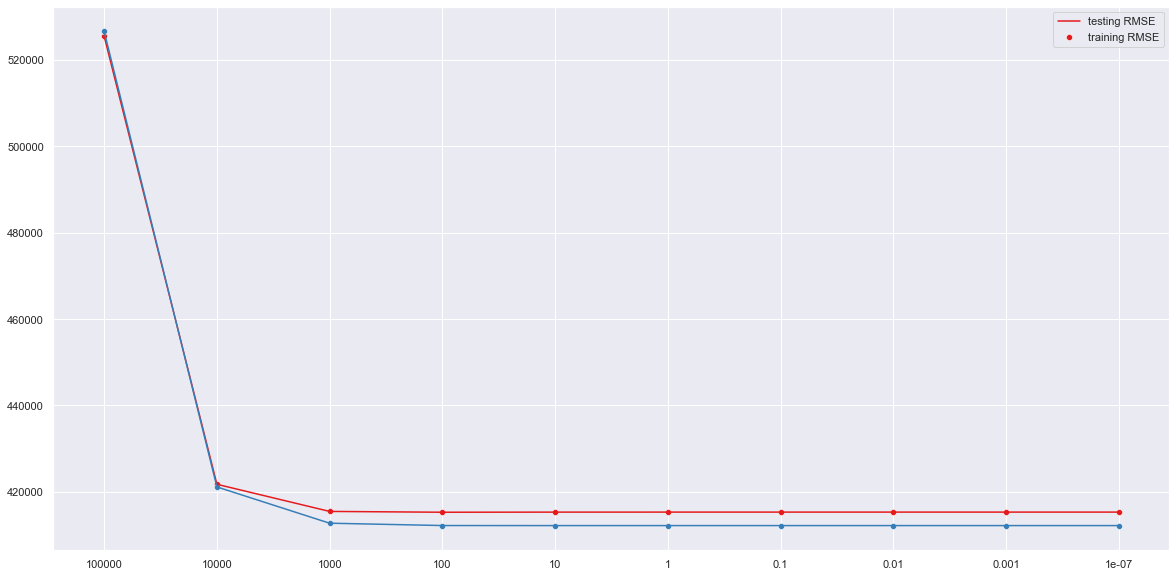

In [40]:
# Plot the alphas
sns.set(palette='Set1')
length = range(len(alpha))

plt.figure(figsize = (20,10))

sns.lineplot(length, testing_rmse)
sns.scatterplot(length, testing_rmse)

sns.lineplot(length,training_rmse)
sns.scatterplot(length, training_rmse)

plt.legend(['testing RMSE', 'training RMSE'])
plt.xticks(length, alpha);

In [41]:
pd.DataFrame(
    {
    'alpha': alpha,
    'train RMSE': training_rmse,
    'test RMSE': testing_rmse
    }
)

,alpha,train RMSE,test RMSE
0,1.000000e+05,526598.999022,525478.629796
1,1.000000e+04,421131.743463,421744.462216
2,1.000000e+03,412735.139049,415463.847810
3,1.000000e+02,412193.675380,415273.869655
4,1.000000e+01,412182.345735,415300.970875
5,1.000000e+00,412182.219178,415305.011652
6,1.000000e-01,412182.217808,415305.427461
7,1.000000e-02,412182.217794,415305.469190
8,1.000000e-03,412182.217794,415305.473364
9,1.000000e-07,412182.217794,415305.473827


### **Interpretasi**

Dari alpha 1 sampai 0.00001, nilai RMSE untuk train dan test set sudah tidak terlalu berubah signifikan. Jadi, untuk kasus kali ini digunakan alpha=100 saja.

## **Modeling**

In [42]:
# Model
model = Lasso(alpha=100)

# Model training
model.fit(X_train_prep_scaled, y_train)

# Model predicting test set  
y_pred = model.predict(X_test_prep_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE:', mse)
print('RMSE:', rmse)

MSE: 172452386818.2567
RMSE: 415273.86965502263


### **Model Properties**

In [43]:
model_coef = pd.DataFrame({
    'feature': list(X_train_prep_scaled),
    'coef': model.coef_
}).sort_values('coef')

model_coef

,feature,coef
25,Regionname_3,-374528.923114
1,x0_u,-323851.539542
22,Regionname_0,-308944.383540
27,Distance,-230412.377056
33,YearBuilt,-195268.575296
0,x0_t,-174087.569977
21,CouncilArea_5,-68419.461198
19,CouncilArea_3,-60668.885441
9,Suburb_3,-38923.704283
7,Suburb_1,-30646.521248


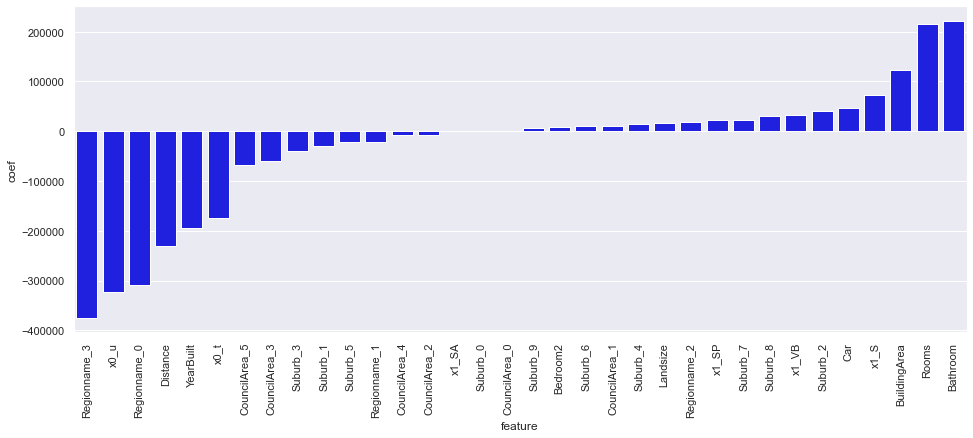

In [44]:
plt.figure(figsize=(16,6))
sns.barplot(data=model_coef, x='feature', y='coef', color='b')
plt.xticks(rotation=90)
plt.show()